In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

In [2]:
df = pd.read_csv('labels.csv')
df.head()

,filepath,xmin,xmax,ymin,ymax
0,./image/N1.xml,1100,1391,669,706
1,./image/N100.xml,138,297,316,343
2,./image/N101.xml,33,135,132,157
3,./image/N102.xml,164,316,221,245
4,./image/N103.xml,819,1064,685,734


In [3]:
import xml.etree.ElementTree as xet

In [4]:
filename = df['filepath'][0]
filename

'./image/N1.xml'

In [5]:
# access filename from csv dataframe
xet.parse(filename).getroot().find('filename').text

'N1.jpeg'

In [6]:
def getFilename(filename):
    filename_image = xet.parse(filename).getroot().find('filename').text
#     giving file path instead of file name
    filepath_image = os.path.join('./image', filename_image)
    return filepath_image

In [7]:
getFilename(filename)

'./image/N1.jpeg'

In [8]:
# applly above function to the df
df['filepath'].apply(getFilename)

0        ./image/N1.jpeg
1      ./image/N100.jpeg
2      ./image/N101.jpeg
3      ./image/N102.jpeg
4      ./image/N103.jpeg
             ...        
223     ./image/N95.jpeg
224     ./image/N96.jpeg
225     ./image/N97.jpeg
226     ./image/N98.jpeg
227     ./image/N99.jpeg
Name: filepath, Length: 228, dtype: object

In [9]:
# convert above data into list
image_path = list(df['filepath'].apply(getFilename))
image_path

['./image/N1.jpeg',
 './image/N100.jpeg',
 './image/N101.jpeg',
 './image/N102.jpeg',
 './image/N103.jpeg',
 './image/N104.jpeg',
 './image/N105.jpeg',
 './image/N106.jpeg',
 './image/N107.jpeg',
 './image/N108.jpeg',
 './image/N109.jpeg',
 './image/N11.jpeg',
 './image/N110.jpeg',
 './image/N111.jpeg',
 './image/N112.jpeg',
 './image/N113.jpeg',
 './image/N114.jpeg',
 './image/N116.jpeg',
 './image/N117.jpeg',
 './image/N118.jpeg',
 './image/N119.jpeg',
 './image/N12.jpeg',
 './image/N120.jpeg',
 './image/N121.jpeg',
 './image/N122.jpeg',
 './image/N123.jpeg',
 './image/N124.jpeg',
 './image/N126.jpeg',
 './image/N127.jpeg',
 './image/N128.jpeg',
 './image/N129.jpeg',
 './image/N130.jpeg',
 './image/N131.jpeg',
 './image/N132.jpeg',
 './image/N133.jpeg',
 './image/N134.jpeg',
 './image/N135.jpeg',
 './image/N136.jpeg',
 './image/N137.jpeg',
 './image/N138.jpeg',
 './image/N139.jpeg',
 './image/N14.jpeg',
 './image/N140.jpeg',
 './image/N141.jpeg',
 './image/N142.jpeg',
 './image/N143.


# verify image and output


In [10]:
file_path = image_path[1]
file_path

'./image/N100.jpeg'

In [11]:
# img = cv2.imread(file_path)

# cv2.namedWindow('example',cv2.WINDOW_NORMAL)
# cv2.imshow('example', img)
# cv2.waitkey(0)
# cv2.destroyAllwindows()

In [12]:
# This is matplotlib image show 

# img = cv2.imread(file_path)
# rbg_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# plt.imshow(rbg_img)
# plt.show()

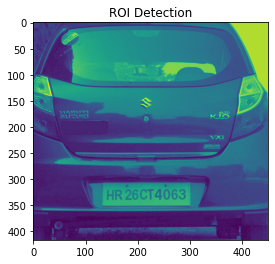

In [13]:
img = cv2.imread(file_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray)
plt.title("ROI Detection")
plt.show()

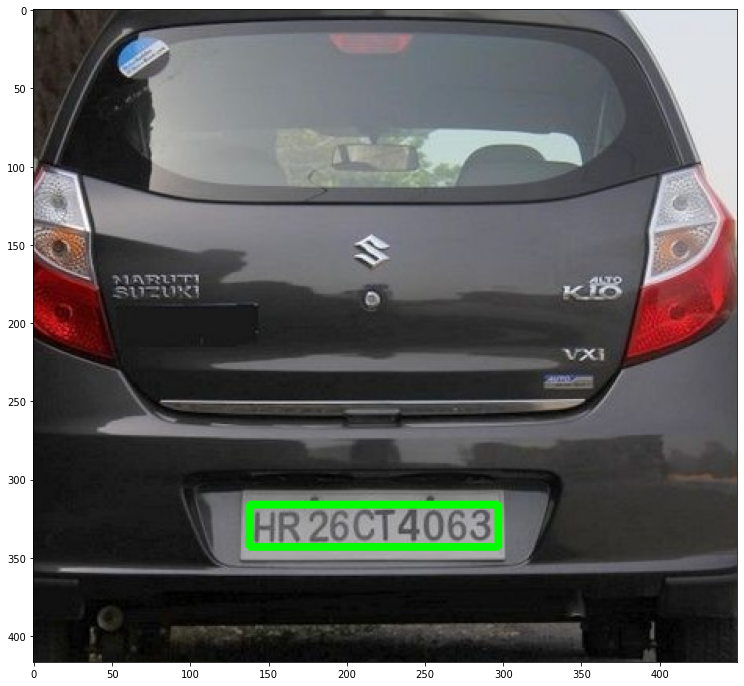

In [14]:
# # N1.jpeg    1100	1391	669	706
# cv2.rectangle(img,(1100,669), (1391,706),(0,255,0),3) # green and thickness = 3

# N100.jpeg    138	297	316	343
cv2.rectangle(img, (138,316),(297,343), (0,255,0),3)

rbg_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Increase size of plot in jupyter
plt.rcParams["figure.figsize"] = (16,12)

plt.imshow(rbg_img)
plt.show()

In [15]:
# Data Preprocessing

In [16]:
!pip install -U scikit-learn scipy matplotlib

In [17]:
!pip install tensorflow

In [18]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array

2022-08-23 09:27:17.294950: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/captain/anaconda3/envs/webapp/lib/python3.8/site-packages/cv2/../../lib64:
2022-08-23 09:27:17.294978: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [19]:
# get target values in an array

labels = df.iloc[:,1:].values
labels[1]

array([138, 297, 316, 343])

In [20]:
len(image_path)

228

In [21]:
# append all arrays, input and output
data = []
output = []


for ind in range(len(image_path)):

    image = image_path[ind]
    img_arr = cv2.imread(image)
    h,w,d = img_arr.shape
    # setting the target size
    #preprocessing
    load_image = load_img(image,target_size = (224,224))
    load_image_arr = img_to_array(load_image)

    # normalization
    norm_load_image_arr = load_image_arr/255.0

    #normalization to labels
    xmin,xmax,ymin,ymax = labels[ind]
    # x width y height
    nxmin,nxmax = xmin/w,xmax/w
    nymin,nymax = ymin/h,ymax/h

    # normalization to labels
    label_norm = (nxmin,nxmax,nymin,nymax)
    
    #------------------------------append -------------
    data.append(norm_load_image_arr)
    output.append(label_norm)

In [22]:
label_norm

(0.33544303797468356,
 0.8059071729957806,
 0.3954802259887006,
 0.5141242937853108)

In [23]:
load_image_arr

array([[[45., 45., 43.],
        [43., 43., 41.],
        [57., 57., 55.],
        ...,
        [52., 53., 48.],
        [55., 56., 51.],
        [59., 60., 55.]],

       [[44., 44., 42.],
        [50., 50., 48.],
        [56., 56., 54.],
        ...,
        [51., 52., 47.],
        [53., 54., 49.],
        [55., 56., 51.]],

       [[49., 49., 47.],
        [49., 49., 47.],
        [50., 50., 48.],
        ...,
        [53., 54., 49.],
        [54., 55., 50.],
        [53., 54., 49.]],

       ...,

       [[12., 26., 53.],
        [14., 28., 55.],
        [15., 29., 56.],
        ...,
        [67., 62., 56.],
        [64., 59., 53.],
        [65., 60., 54.]],

       [[12., 27., 58.],
        [17., 32., 63.],
        [18., 33., 64.],
        ...,
        [56., 51., 45.],
        [55., 50., 44.],
        [55., 50., 44.]],

       [[15., 33., 71.],
        [16., 35., 75.],
        [17., 36., 76.],
        ...,
        [49., 46., 41.],
        [45., 42., 37.],
        [50., 47., 42.]]

In [24]:
data 

[array([[[0.8352941 , 0.9764706 , 0.96862745],
         [0.8392157 , 1.        , 0.99607843],
         [0.8392157 , 1.        , 0.99607843],
         ...,
         [0.5764706 , 0.44313726, 0.4392157 ],
         [0.57254905, 0.4509804 , 0.44313726],
         [0.64705884, 0.5254902 , 0.5176471 ]],
 
        [[0.9137255 , 1.        , 1.        ],
         [0.88235295, 1.        , 1.        ],
         [0.87058824, 0.99607843, 0.99215686],
         ...,
         [0.5921569 , 0.4392157 , 0.44313726],
         [0.52156866, 0.3882353 , 0.39215687],
         [0.54901963, 0.41568628, 0.41960785]],
 
        [[0.89411765, 0.99215686, 0.9764706 ],
         [0.8980392 , 1.        , 0.99607843],
         [0.88235295, 1.        , 1.        ],
         ...,
         [0.5529412 , 0.39607844, 0.4       ],
         [0.5647059 , 0.4117647 , 0.42352942],
         [0.5411765 , 0.4       , 0.40784314]],
 
        ...,
 
        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 0.99215

In [25]:
output

[(0.5729166666666666,
  0.7244791666666667,
  0.6194444444444445,
  0.6537037037037037),
 (0.30666666666666664, 0.66, 0.7577937649880095, 0.8225419664268585),
 (0.13253012048192772,
  0.5421686746987951,
  0.5523012552301255,
  0.6569037656903766),
 (0.34309623430962344,
  0.6610878661087866,
  0.5594936708860759,
  0.620253164556962),
 (0.455, 0.5911111111111111, 0.5708333333333333, 0.6116666666666667),
 (0.18037135278514588,
  0.41114058355437666,
  0.6967213114754098,
  0.7950819672131147),
 (0.726, 0.868, 0.6055363321799307, 0.6747404844290658),
 (0.2278688524590164,
  0.4311475409836066,
  0.5216494845360825,
  0.5917525773195876),
 (0.47392290249433106,
  0.7913832199546486,
  0.512396694214876,
  0.7575757575757576),
 (0.39462809917355374,
  0.6962809917355371,
  0.49780701754385964,
  0.543859649122807),
 (0.18545454545454546,
  0.42727272727272725,
  0.45692883895131087,
  0.5955056179775281),
 (0.5018181818181818,
  0.6763636363636364,
  0.7158469945355191,
  0.78142076502732

In [26]:
#split data into train and test

x = np.array(data,dtype=np.float32)
y = np.array(output,dtype=np.float32)

In [27]:
x.shape,y.shape
# (228 images and 4 outputs)

((228, 224, 224, 3), (228, 4))

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

# x_train 181 images, x_test 46 images, ytrain 182 images, y_test 46 images

((182, 224, 224, 3), (46, 224, 224, 3), (182, 4), (46, 4))

# Deep Learning Model

MobileNetv2, InceptionV3, InceptionResNetV2

In [29]:
from tensorflow.keras.applications import MobileNetV2, InceptionV3, InceptionResNetV2
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.models import Model
import tensorflow as tf

In [31]:
inception_resnet = InceptionResNetV2(weights='imagenet',include_top=False,
                                     input_tensor = Input(shape = (224,224,3)))

inception_resnet.trainable=False
#-------------------------------
headmodel = inception_resnet.output
headmodel = Flatten()(headmodel)
headmodel = Dense(500,activation='relu')(headmodel)
headmodel = Dense(250,activation ='relu')(headmodel)

headmodel = Dense(4,activation = 'sigmoid')(headmodel)

#---------------model -------------
model = Model(inputs=inception_resnet.input,outputs=headmodel)

2022-08-23 09:32:47.718232: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 76800000 exceeds 10% of free system memory.
2022-08-23 09:32:47.803476: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 76800000 exceeds 10% of free system memory.


In [33]:
# compile model

model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4)) #mean square error = regration model
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_203 (Conv2D)            (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_203 (Batch  (None, 111, 111, 32  96         ['conv2d_203[0][0]']             
 Normalization)                 )                                                           

 batch_normalization_208 (Batch  (None, 25, 25, 96)  288         ['conv2d_208[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_210 (Batch  (None, 25, 25, 64)  192         ['conv2d_210[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_213 (Batch  (None, 25, 25, 96)  288         ['conv2d_213[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_214 (Batch  (None, 25, 25, 64)  192         ['conv2d_214[0][0]']             
 Normaliza

 activation_224 (Activation)    (None, 25, 25, 32)   0           ['batch_normalization_224[0][0]']
                                                                                                  
 conv2d_222 (Conv2D)            (None, 25, 25, 32)   10240       ['block35_1_ac[0][0]']           
                                                                                                  
 conv2d_225 (Conv2D)            (None, 25, 25, 48)   13824       ['activation_224[0][0]']         
                                                                                                  
 batch_normalization_222 (Batch  (None, 25, 25, 32)  96          ['conv2d_222[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_225 (Batch  (None, 25, 25, 48)  144         ['conv2d_225[0][0]']             
 Normaliza

                                                                                                  
 activation_227 (Activation)    (None, 25, 25, 32)   0           ['batch_normalization_227[0][0]']
                                                                                                  
 activation_229 (Activation)    (None, 25, 25, 32)   0           ['batch_normalization_229[0][0]']
                                                                                                  
 activation_232 (Activation)    (None, 25, 25, 64)   0           ['batch_normalization_232[0][0]']
                                                                                                  
 block35_3_mixed (Concatenate)  (None, 25, 25, 128)  0           ['activation_227[0][0]',         
                                                                  'activation_229[0][0]',         
                                                                  'activation_232[0][0]']         
          

 Normalization)                                                                                   
                                                                                                  
 batch_normalization_243 (Batch  (None, 25, 25, 48)  144         ['conv2d_243[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_240 (Activation)    (None, 25, 25, 32)   0           ['batch_normalization_240[0][0]']
                                                                                                  
 activation_243 (Activation)    (None, 25, 25, 48)   0           ['batch_normalization_243[0][0]']
                                                                                                  
 conv2d_239 (Conv2D)            (None, 25, 25, 32)   10240       ['block35_4_ac[0][0]']           
          

 block35_6_mixed (Concatenate)  (None, 25, 25, 128)  0           ['activation_245[0][0]',         
                                                                  'activation_247[0][0]',         
                                                                  'activation_250[0][0]']         
                                                                                                  
 block35_6_conv (Conv2D)        (None, 25, 25, 320)  41280       ['block35_6_mixed[0][0]']        
                                                                                                  
 block35_6 (Lambda)             (None, 25, 25, 320)  0           ['block35_5_ac[0][0]',           
                                                                  'block35_6_conv[0][0]']         
                                                                                                  
 block35_6_ac (Activation)      (None, 25, 25, 320)  0           ['block35_6[0][0]']              
          

 activation_261 (Activation)    (None, 25, 25, 48)   0           ['batch_normalization_261[0][0]']
                                                                                                  
 conv2d_257 (Conv2D)            (None, 25, 25, 32)   10240       ['block35_7_ac[0][0]']           
                                                                                                  
 conv2d_259 (Conv2D)            (None, 25, 25, 32)   9216        ['activation_258[0][0]']         
                                                                                                  
 conv2d_262 (Conv2D)            (None, 25, 25, 64)   27648       ['activation_261[0][0]']         
                                                                                                  
 batch_normalization_257 (Batch  (None, 25, 25, 32)  96          ['conv2d_257[0][0]']             
 Normalization)                                                                                   
          

                                                                  'block35_9_conv[0][0]']         
                                                                                                  
 block35_9_ac (Activation)      (None, 25, 25, 320)  0           ['block35_9[0][0]']              
                                                                                                  
 conv2d_272 (Conv2D)            (None, 25, 25, 32)   10240       ['block35_9_ac[0][0]']           
                                                                                                  
 batch_normalization_272 (Batch  (None, 25, 25, 32)  96          ['conv2d_272[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_272 (Activation)    (None, 25, 25, 32)   0           ['batch_normalization_272[0][0]']
          

 activation_278 (Activation)    (None, 12, 12, 384)  0           ['batch_normalization_278[0][0]']
                                                                                                  
 max_pooling2d_6 (MaxPooling2D)  (None, 12, 12, 320)  0          ['block35_10_ac[0][0]']          
                                                                                                  
 mixed_6a (Concatenate)         (None, 12, 12, 1088  0           ['activation_275[0][0]',         
                                )                                 'activation_278[0][0]',         
                                                                  'max_pooling2d_6[0][0]']        
                                                                                                  
 conv2d_280 (Conv2D)            (None, 12, 12, 128)  139264      ['mixed_6a[0][0]']               
                                                                                                  
 batch_nor

                                )                                 'block17_2_conv[0][0]']         
                                                                                                  
 block17_2_ac (Activation)      (None, 12, 12, 1088  0           ['block17_2[0][0]']              
                                )                                                                 
                                                                                                  
 conv2d_288 (Conv2D)            (None, 12, 12, 128)  139264      ['block17_2_ac[0][0]']           
                                                                                                  
 batch_normalization_288 (Batch  (None, 12, 12, 128)  384        ['conv2d_288[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

                                )                                                                 
                                                                                                  
 conv2d_296 (Conv2D)            (None, 12, 12, 128)  139264      ['block17_4_ac[0][0]']           
                                                                                                  
 batch_normalization_296 (Batch  (None, 12, 12, 128)  384        ['conv2d_296[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_296 (Activation)    (None, 12, 12, 128)  0           ['batch_normalization_296[0][0]']
                                                                                                  
 conv2d_297 (Conv2D)            (None, 12, 12, 160)  143360      ['activation_296[0][0]']         
          

                                                                                                  
 batch_normalization_304 (Batch  (None, 12, 12, 128)  384        ['conv2d_304[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_304 (Activation)    (None, 12, 12, 128)  0           ['batch_normalization_304[0][0]']
                                                                                                  
 conv2d_305 (Conv2D)            (None, 12, 12, 160)  143360      ['activation_304[0][0]']         
                                                                                                  
 batch_normalization_305 (Batch  (None, 12, 12, 160)  480        ['conv2d_305[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 activation_312 (Activation)    (None, 12, 12, 128)  0           ['batch_normalization_312[0][0]']
                                                                                                  
 conv2d_313 (Conv2D)            (None, 12, 12, 160)  143360      ['activation_312[0][0]']         
                                                                                                  
 batch_normalization_313 (Batch  (None, 12, 12, 160)  480        ['conv2d_313[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_313 (Activation)    (None, 12, 12, 160)  0           ['batch_normalization_313[0][0]']
                                                                                                  
 conv2d_31

 conv2d_321 (Conv2D)            (None, 12, 12, 160)  143360      ['activation_320[0][0]']         
                                                                                                  
 batch_normalization_321 (Batch  (None, 12, 12, 160)  480        ['conv2d_321[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_321 (Activation)    (None, 12, 12, 160)  0           ['batch_normalization_321[0][0]']
                                                                                                  
 conv2d_319 (Conv2D)            (None, 12, 12, 192)  208896      ['block17_10_ac[0][0]']          
                                                                                                  
 conv2d_322 (Conv2D)            (None, 12, 12, 192)  215040      ['activation_321[0][0]']         
          

 Normalization)                                                                                   
                                                                                                  
 activation_329 (Activation)    (None, 12, 12, 160)  0           ['batch_normalization_329[0][0]']
                                                                                                  
 conv2d_327 (Conv2D)            (None, 12, 12, 192)  208896      ['block17_12_ac[0][0]']          
                                                                                                  
 conv2d_330 (Conv2D)            (None, 12, 12, 192)  215040      ['activation_329[0][0]']         
                                                                                                  
 batch_normalization_327 (Batch  (None, 12, 12, 192)  576        ['conv2d_327[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 conv2d_335 (Conv2D)            (None, 12, 12, 192)  208896      ['block17_14_ac[0][0]']          
                                                                                                  
 conv2d_338 (Conv2D)            (None, 12, 12, 192)  215040      ['activation_337[0][0]']         
                                                                                                  
 batch_normalization_335 (Batch  (None, 12, 12, 192)  576        ['conv2d_335[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_338 (Batch  (None, 12, 12, 192)  576        ['conv2d_338[0][0]']             
 Normalization)                                                                                   
          

 conv2d_346 (Conv2D)            (None, 12, 12, 192)  215040      ['activation_345[0][0]']         
                                                                                                  
 batch_normalization_343 (Batch  (None, 12, 12, 192)  576        ['conv2d_343[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_346 (Batch  (None, 12, 12, 192)  576        ['conv2d_346[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_343 (Activation)    (None, 12, 12, 192)  0           ['batch_normalization_343[0][0]']
                                                                                                  
 activatio

 Normalization)                                                                                   
                                                                                                  
 batch_normalization_354 (Batch  (None, 12, 12, 192)  576        ['conv2d_354[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_351 (Activation)    (None, 12, 12, 192)  0           ['batch_normalization_351[0][0]']
                                                                                                  
 activation_354 (Activation)    (None, 12, 12, 192)  0           ['batch_normalization_354[0][0]']
                                                                                                  
 block17_19_mixed (Concatenate)  (None, 12, 12, 384)  0          ['activation_351[0][0]',         
          

 activation_359 (Activation)    (None, 12, 12, 256)  0           ['batch_normalization_359[0][0]']
                                                                                                  
 activation_361 (Activation)    (None, 12, 12, 256)  0           ['batch_normalization_361[0][0]']
                                                                                                  
 activation_364 (Activation)    (None, 12, 12, 288)  0           ['batch_normalization_364[0][0]']
                                                                                                  
 conv2d_360 (Conv2D)            (None, 5, 5, 384)    884736      ['activation_359[0][0]']         
                                                                                                  
 conv2d_362 (Conv2D)            (None, 5, 5, 288)    663552      ['activation_361[0][0]']         
                                                                                                  
 conv2d_36

                                                                                                  
 activation_372 (Activation)    (None, 5, 5, 224)    0           ['batch_normalization_372[0][0]']
                                                                                                  
 conv2d_370 (Conv2D)            (None, 5, 5, 192)    399360      ['block8_1_ac[0][0]']            
                                                                                                  
 conv2d_373 (Conv2D)            (None, 5, 5, 256)    172032      ['activation_372[0][0]']         
                                                                                                  
 batch_normalization_370 (Batch  (None, 5, 5, 192)   576         ['conv2d_370[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_nor

 batch_normalization_378 (Batch  (None, 5, 5, 192)   576         ['conv2d_378[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_381 (Batch  (None, 5, 5, 256)   768         ['conv2d_381[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_378 (Activation)    (None, 5, 5, 192)    0           ['batch_normalization_378[0][0]']
                                                                                                  
 activation_381 (Activation)    (None, 5, 5, 256)    0           ['batch_normalization_381[0][0]']
                                                                                                  
 block8_4_

                                                                                                  
 activation_389 (Activation)    (None, 5, 5, 256)    0           ['batch_normalization_389[0][0]']
                                                                                                  
 block8_6_mixed (Concatenate)   (None, 5, 5, 448)    0           ['activation_386[0][0]',         
                                                                  'activation_389[0][0]']         
                                                                                                  
 block8_6_conv (Conv2D)         (None, 5, 5, 2080)   933920      ['block8_6_mixed[0][0]']         
                                                                                                  
 block8_6 (Lambda)              (None, 5, 5, 2080)   0           ['block8_5_ac[0][0]',            
                                                                  'block8_6_conv[0][0]']          
          

                                                                                                  
 block8_8 (Lambda)              (None, 5, 5, 2080)   0           ['block8_7_ac[0][0]',            
                                                                  'block8_8_conv[0][0]']          
                                                                                                  
 block8_8_ac (Activation)       (None, 5, 5, 2080)   0           ['block8_8[0][0]']               
                                                                                                  
 conv2d_399 (Conv2D)            (None, 5, 5, 192)    399360      ['block8_8_ac[0][0]']            
                                                                                                  
 batch_normalization_399 (Batch  (None, 5, 5, 192)   576         ['conv2d_399[0][0]']             
 Normalization)                                                                                   
          

 )                                                                                                
                                                                                                  
 conv_7b_ac (Activation)        (None, 5, 5, 1536)   0           ['conv_7b_bn[0][0]']             
                                                                                                  
 flatten_1 (Flatten)            (None, 38400)        0           ['conv_7b_ac[0][0]']             
                                                                                                  
 dense_3 (Dense)                (None, 500)          19200500    ['flatten_1[0][0]']              
                                                                                                  
 dense_4 (Dense)                (None, 250)          125250      ['dense_3[0][0]']                
                                                                                                  
 dense_5 (

# Model training

In [34]:
from tensorflow.keras.callbacks import TensorBoard

In [36]:
tfb = TensorBoard('object_detection')


In [ ]:
# history = model.fit(x=x_train,batch_size=10,epochs=100,
#                    validation_data=(x_test,y_test),callbacks=[tfb]

In [ ]:
# after training the model we want to save this model 
model.save('./models/object_detection.h5')